In [1]:
#Código original en C del Icalc, no borrar hasta que comprobemos que está bien pasado
''' 
os << fs[i].name; 
vector<int> b = Complejidad::B(fs[i].seq);
// complejidad
os << "|" << Complejidad::ICalc(b);


double Complejidad::ICalc(const vector<int> b){
    double res = 0;
    for(unsigned int i=0;i<b.size();i++) res+=1.0/(1.0+b[i]);
    return res/b.size();
}


vector<int> Complejidad::B(const string s){
    vector<int> res;
    for(int i=0;i<(int)s.size();i++) {
        int mr = 0;
	    for(int j=i;j>mr;--j) {
		    if (s.substr(j-mr,mr)!=s.substr(i-mr+1,mr)) continue;
		        while (s[i-mr] == s[j-mr-1]) ++mr;
	    }
	    res.push_back(mr);
    }
    return res;
}'''

' \nos << fs[i].name; \nvector<int> b = Complejidad::B(fs[i].seq);\n// complejidad\nos << "|" << Complejidad::ICalc(b);\n\n\ndouble Complejidad::ICalc(const vector<int> b){\n    double res = 0;\n    for(unsigned int i=0;i<b.size();i++) res+=1.0/(1.0+b[i]);\n    return res/b.size();\n}\n\n\nvector<int> Complejidad::B(const string s){\n    vector<int> res;\n    for(int i=0;i<(int)s.size();i++) {\n        int mr = 0;\n\t    for(int j=i;j>mr;--j) {\n\t\t    if (s.substr(j-mr,mr)!=s.substr(i-mr+1,mr)) continue;\n\t\t        while (s[i-mr] == s[j-mr-1]) ++mr;\n\t    }\n\t    res.push_back(mr);\n    }\n    return res;\n}'

In [6]:
import matplotlib.pyplot as plt
from base import *
dataset = "uniprot_sprot"

In [3]:
suffle_to_file(dataset + ".fasta", dataset + "_suffled.fasta")

In [4]:
random_to_file(dataset + ".fasta", dataset + "_random.fasta")

In [7]:
def filter_to_file(dataset, out_file):
    f = open(out_file, "w")
    for seq_record in SeqIO.parse(dataset, "fasta"):
        if (len(seq_record) < 50):
            f.write(">" + seq_record.description + "\n")
            write_with_size(str(seq_record.seq), f)
    f.close()

filter_to_file("uniprot_sprot.fasta", "uniprot_sprot_filtered.fasta")

In [5]:

sizes = size_to_list(dataset + ".fasta")
icalcs_original = icalc_to_list(dataset + ".fasta")



KeyboardInterrupt: 

# Graficación

Carga de datos

In [9]:
dataset = "proteinnet7"
dataset = "ls_orchid"

dataset0 = dataset + ".fasta"
dataset1 = dataset + "_suffled.fasta"
dataset2 = dataset + "_random.fasta"

Cálculo de tamaños

In [17]:
s = size_to_list("pn7.fasta")

In [14]:
sizes = size_to_list(dataset0)

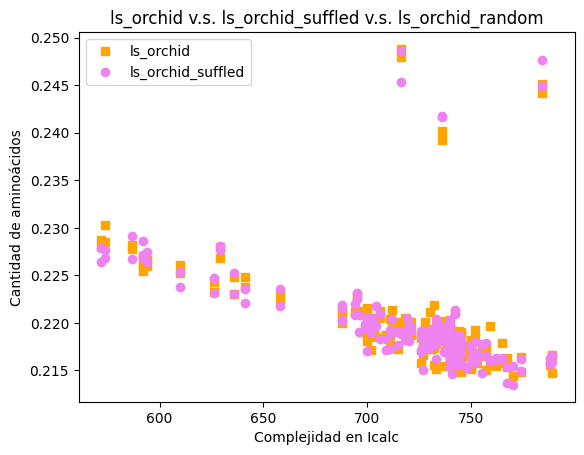

In [17]:

title = dataset0[:-6] + " v.s. " + dataset1[:-6] + " v.s. " + dataset2[:-6]
plt.title(title)
plt.xlabel("Complejidad en Icalc")
plt.ylabel("Cantidad de aminoácidos")

#plt.figure(figsize=(7,4))

plt.plot(sizes, icalcs_original,'s', label = dataset0[:-6], color='orange')
plt.plot(sizes, icalcs_suffled, 'o', label = dataset1[:-6], color='violet')
#plt.plot(sizes, icalcs_random, 'o', label = dataset2[:-6], color='blue')
plt.legend()

#plt.xlabel('exponente q', fontsize=16)
#plt.ylim(2, 8)
#plt.ylabel('distancias', fontsize=16)
plt.show()



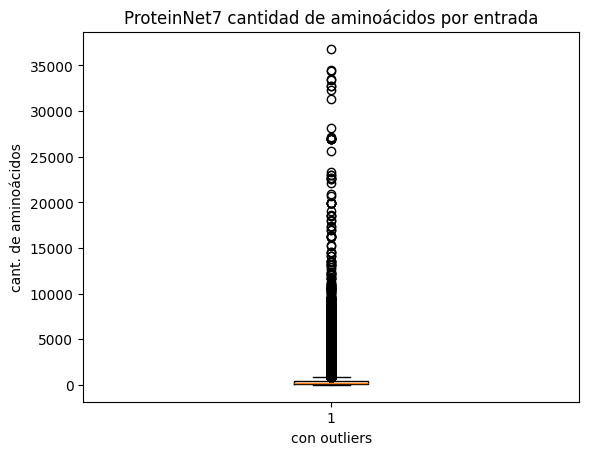

In [26]:

plt.title("ProteinNet7 cantidad de aminoácidos por entrada")
plt.xlabel("con outliers")
plt.ylabel("cant. de aminoácidos")
plt.boxplot(s)

plt.show()

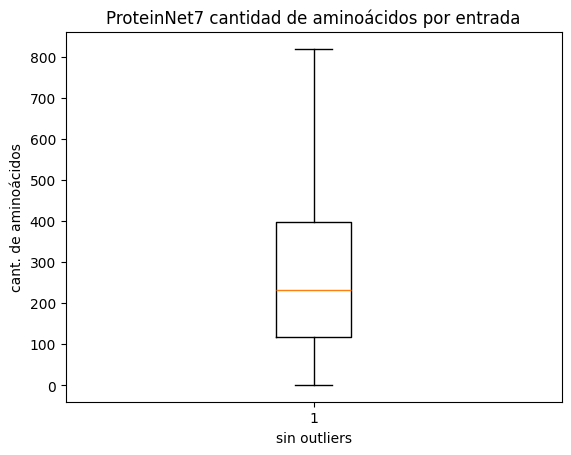

In [27]:
plt.title("ProteinNet7 cantidad de aminoácidos por entrada")
plt.xlabel("sin outliers")
plt.ylabel("cant. de aminoácidos")
plt.boxplot(s, 0, '')

plt.show()

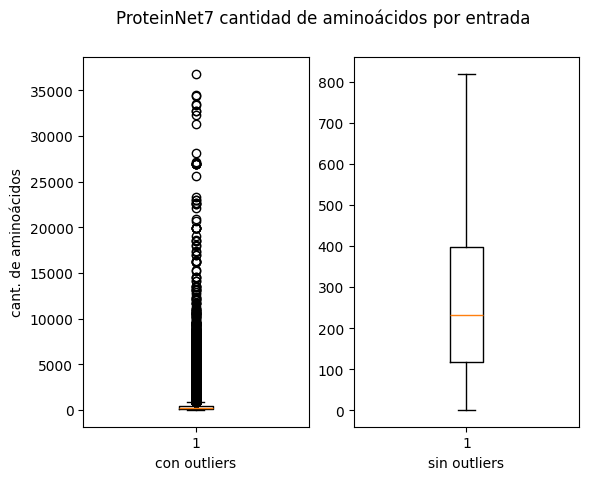

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("ProteinNet7 cantidad de aminoácidos por entrada")

ax1.set_ylabel("cant. de aminoácidos")
ax1.set_xlabel("con outliers")
ax1.boxplot(s)

ax2.set_xlabel("sin outliers")
ax2.boxplot(s, 0, '')

plt.show()

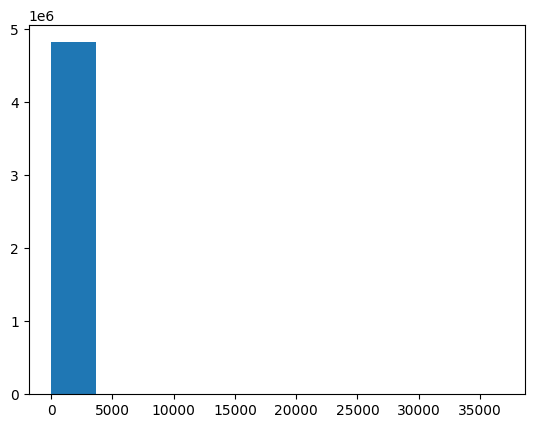

In [32]:
plt.hist(s)
plt.show()

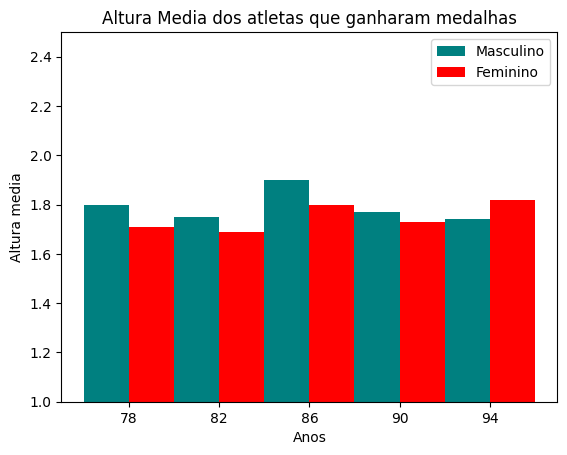

In [44]:
eixo_X_ano = [78,82,86,90,94]
eixo_Y_AMM = [1.8,1.75,1.9,1.77,1.74]
eixo_Y_AMF = [1.71,1.69,1.8,1.73,1.82]

plt.title("Altura Media dos atletas que ganharam medalhas")
plt.xlabel("Anos")
plt.ylabel("Altura media")

largura = 2

x1 = [i - largura/2 for i in eixo_X_ano]
x2 = [i + largura/2 for i in eixo_X_ano]

plt.ylim(1,2.50)
plt.bar(x1, eixo_Y_AMM, largura, label = "Masculino", color = "teal")
plt.bar(x2, eixo_Y_AMF, largura, label = "Feminino", color = "r")
plt.legend()
plt.xticks(eixo_X_ano)
plt.show()

In [8]:
dataset = "usp_f"
sizes = read_list_from_file("sizes_" + dataset + ".txt")
icalcs_original = read_list_from_file("icalc_" + dataset + ".txt")
icalcs_shuffled = read_list_from_file("icalc_" + dataset + "_s01.txt")
icalcs_random = read_list_from_file("icalc_" + dataset + "_r01.txt")
i_s_v = read_list_from_file("icalc_" + dataset + "_s10.txt")
i_r_v = read_list_from_file("icalc_" + dataset + "_r10.txt")

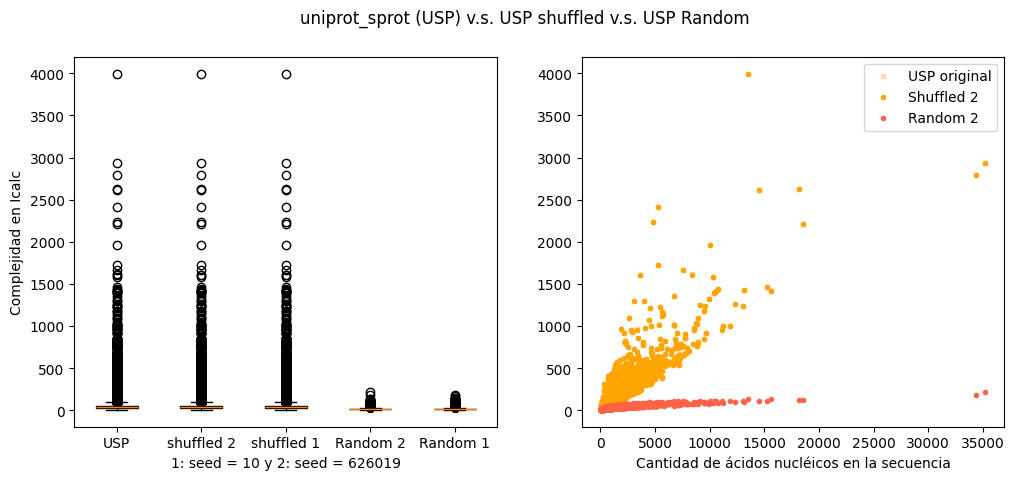

In [9]:
labels = ["USP", "shuffled 2", "shuffled 1", "Random 2", "Random 1"]
colors = ['peachpuff', 'orange', 'grey', 'tomato', 'grey']

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("uniprot_sprot (USP) v.s. USP shuffled v.s. USP Random")
fig.set_figwidth(12)

ax1.set_ylabel("Complejidad en Icalc")

bplot = ax1.boxplot([icalcs_original, icalcs_shuffled, i_s_v, icalcs_random, i_r_v],
                   patch_artist=True,  # fill with color
                   labels=labels)  # will be used to label x-ticks

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax1.set_xlabel("1: seed = 01 y 2: seed = 10")
ax2.set_xlabel("Cantidad de ácidos nucléicos en la secuencia")

ax2.plot(sizes, icalcs_original,'s', markersize=3, label = "USP original", color=colors[0])
ax2.plot(sizes, icalcs_shuffled, 'o', markersize=3, label = "Shuffled 2", color=colors[1])
ax2.plot(sizes, icalcs_random, 'o', markersize=3, label = "Random 2", color=colors[3])
ax2.legend()

plt.show()

In [17]:
def aux_discrepancy_for_2(seq:str, pos:str, neg:str) -> int:
    res = 0
    maxEnding = 0

    for i in range(len(seq)):
        to_add = 1 if seq[i] == pos else (-1 if seq[i] == neg else 0)
        maxEnding = max(maxEnding + to_add, to_add)

        res = max(res, maxEnding)

    return res


def discrepancy(seq:str) -> int:
    alphabet = {"A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y"}
    res = 0

    for i in alphabet:
        remaining_alphabet = alphabet - {i}
        for j in remaining_alphabet:
            res = max(res, aux_discrepancy_for_2(seq, i, j))
    
    return res


arr = "GCTTTCCC"
arr = "AGACTGTGCGGGAAAGACATAGATAGGCAATAAACAGCTGGCAGTCGAAGTTCACGAATGCCGTCAGGCTCGCAAGAGGTGGACAGGAACTTGCCTTACA"
print(discrepancy(arr))

32
